*Harsh Seksaria*

*2048011*

*1-MDS*

*05-02-2021*

*Single and Multiple Linear Regression*

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading dataset
fl = pd.read_csv('../diabetes.csv')
fl.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129,110,46,130,67.1,0.319,26,1
488,4,99,72,17,0,25.6,0.294,28,0
733,2,106,56,27,165,29.0,0.426,22,0
539,3,129,92,49,155,36.4,0.968,32,1
700,2,122,76,27,200,35.9,0.483,26,0


# Regression Analysis
<br>
<font face="Georgia">
Regression Analysis is a supervised learning algorithm which is used to model the relationship between a predictor/independent variable and a target/dependent variable, and it helps in finding the correlation between variables and enables us to predict the continuous output variable based on the one or more predictor variables. It is mainly used for prediction, forecasting, time series modeling, and determining the causal-effect relationship between variables.
    
_Regression shows a line or curve that passes through all the datapoints on target-predictor graph in such a way that the vertical distance between the datapoints and the regression line is minimum._ The distance between datapoints and line tells whether a model has captured a strong relationship or not.
</font>

<u>**Important terms**</u>:

**Dependent Variable** : The variable which is to be predicted is called Dependent Variable. Also called as Target Variable.

**Independent Variable** : The variables which affect or are used to predict the dependent variable is called Independent Variable.

**Outliers** : The values which is either very low or high as compared to other values is called an outlier.

**Multicollinearity** : If the independent variables are highly correlated with each other than other variables, then such condition is called Multicollinearity. It should not be present in the dataset, because it creates problem while ranking the most affecting variable.

**Underfitting & Overfitting** : If our algorithm works well with the training dataset but not well with test dataset, then such problem is called Overfitting. And if our algorithm does not perform well even with training dataset, then such problem is called underfitting.

_There are different types of Regression such as Linear Regression, Logistic Regression, Lasso Regression, etc. Here, we mainly focus on Linear Regression._

# 1. Simple Linear Regression

When there is only one predictor/independent variable as input to predict the target, then such Linear Regression Algorithm is called Simple Linear Regression. It has only one _x_ and only one _y_ variable.

The mathematical equation of Simple Linear Regression is:
> _y = $\beta$ 0 + $\beta$ 1 x + e_

For the dataset used in this project, I'm using **Insulin as a predictor** for Simple Linear Regression.

In [3]:
# Dividing the dataset into predictor and target
x = fl[['Insulin']]
y = fl['Glucose']

#In the output below, we the first column is of indexes and second column is value.

In [4]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [6]:
Y_pred = reg.predict(X_test)
X_pred = reg.predict(X_train)

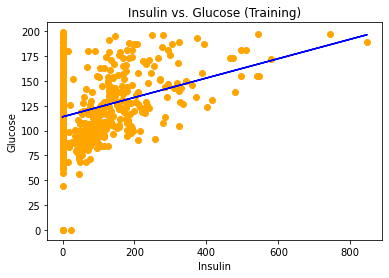

In [9]:
#Scatter Plot for train set
plt.scatter(X_train, Y_train, color="orange")
plt.plot(X_train, X_pred, color="blue")
plt.title("Insulin vs. Glucose (Training)")
plt.xlabel("Insulin")
plt.ylabel('Glucose')
plt.show()

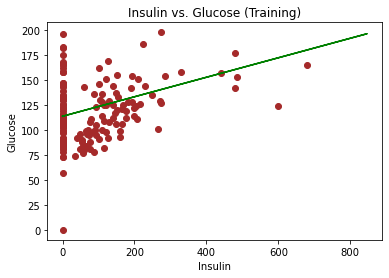

In [47]:
#Scatter Plot for train set
plt.scatter(X_test, Y_test, color="brown")
plt.plot(X_train, X_pred, color="green")
plt.title("Insulin vs. Glucose (Training)")
plt.xlabel("Insulin")
plt.ylabel('Glucose')
plt.show()

# 2. Multiple Linear Regression

There may be cases when target variable is being affected by more than one variable. In such a situation where we have more than one predictor/independent variable, we use Multiple Linear Regression Algorithm.

It can also be said as an extension of Simple Linear Regression as it takes more than one predictor variable.

The mathematical equation of Simple Linear Regression is:
> _y = $\beta$<sub>0</sub> + $\beta$<sub>1</sub>X<sub>1</sub> + $\beta$<sub>2</sub>X<sub>2</sub> + ... +  + $\beta$<sub>n</sub>X<sub>n</sub> + e_

In [52]:
y = fl['Outcome']
x = fl.drop(['Outcome'], axis=1)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [54]:
mulreg = LinearRegression()
mulreg.fit(X_train, Y_train)

LinearRegression()

In [55]:
mulreg.intercept_

-0.8032984877579898

In [56]:
list(zip(x, mulreg.coef_))

[('Pregnancies', 0.01975811889033599),
 ('Glucose', 0.006312970358743401),
 ('BloodPressure', -0.0026733849929980683),
 ('SkinThickness', -5.135769012273863e-05),
 ('Insulin', -0.00018009348329259926),
 ('BMI', 0.012097323660906734),
 ('DiabetesPedigreeFunction', 0.1222285012379883),
 ('Age', 0.001862077488733496)]

In [57]:
mlr_x_pred = mulreg.predict(X_train)
mlr_y_pred = mulreg.predict(X_test)

In [60]:
mulreg.score(x, y)*100

30.11351107318084

In [62]:
from sklearn import metrics
print('Mean Absolute error :', metrics.mean_absolute_error(Y_test, mlr_y_pred))
print('Mean Square error :', metrics.mean_squared_error(Y_test, mlr_y_pred))
print('Root Mean Square error :', np.sqrt(metrics.mean_squared_error(Y_test, mlr_y_pred)))

Mean Absolute error : 0.3338354688675196
Mean Square error : 0.16668765276364017
Root Mean Square error : 0.40827399226945643
